In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import process_utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
import time

In [2]:
dataLED = psu.read_file('/data/abalone/2021_05_05/SiPM2_32V_ABALONE_12k_LED_10V.dat')
data = psu.read_file('/data/abalone/2021_05_05/SiPM2_32V_ABALONE_12k_NoLED.dat')

/data/abalone/2021_05_05/SiPM2_32V_ABALONE_12k_LED_10V.dat Number of events 59356.0
/data/abalone/2021_05_05/SiPM2_32V_ABALONE_12k_NoLED.dat Number of events 444326.0


In [3]:
#psu.plot_waveforms2( data, events = 5)

In [4]:
#psu.plot_waveforms2( dataLED, events = 5)

In [50]:
def process_abalone_data(data,nn=1000,nplot=5,width_calc=False):
    print(f'Total events number: {len(data)}')
    MINs, FOMs, MAXs, INTs, width50 = [], [], [], [], []
    ts = time.time()
    plt.figure(figsize=(12,6))
    if nn == 0: nn = len(data)
    for i in range(nn):
        if (i % 50000) == 0: print(f'event n. {i} time to process: {time.time()-ts:.2f}')
        bl=np.max(data[i][:])
        wf = bl-data[i]
        max_pos = np.where(wf==np.max(wf))[0][0]
        area = np.sum(wf)
        fom = np.sum(wf[max_pos:])/area
        MINs.append(bl)
        MAXs.append(np.max(wf))
        FOMs.append(fom)
        INTs.append(area)
        if width_calc:
            ii, areafrac = 1, 0
            while areafrac < 0.5:
                ilo50, ihi50 = max_pos-ii, max_pos+ii
                areafrac = np.sum(wf[ilo50:ihi50])/area
                ii += 1
                wid50 = ihi50 - ilo50
            width50.append(wid50)
        if i < nplot: plt.plot(wf,label=f'A={area}, f.o.m.={fom:.2f}')
    plt.legend()
    return MINs, FOMs, MAXs, INTs, width50

Total events number: 444326
event n. 0 time to process: 0.00
event n. 50000 time to process: 1.44
event n. 100000 time to process: 2.81
event n. 150000 time to process: 4.17
event n. 200000 time to process: 5.54
event n. 250000 time to process: 6.92
event n. 300000 time to process: 8.29
event n. 350000 time to process: 9.65
event n. 400000 time to process: 11.02


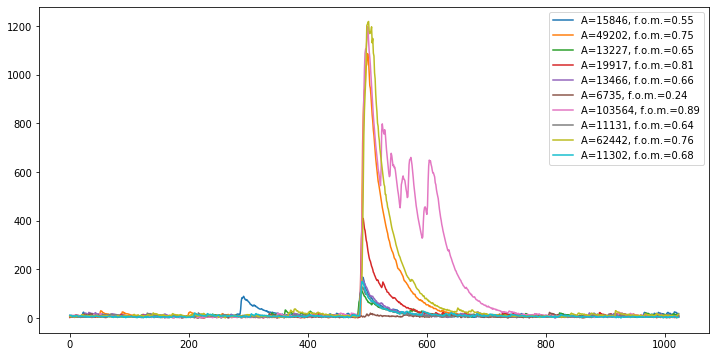

In [51]:
MINs, FOMs, MAXs, INTs, width50 = process_abalone_data(data,nn=0,nplot=10)

In [52]:
width50, INTs, MAXs, FOMs=np.array(width50),np.array(INTs),np.array(MAXs),np.array(FOMs)

In [31]:
def plot_hist1D(MINs,MAXs,FOMs,AREAs,width50,bins=200):
    area_space = np.logspace(3.5,7, bins)
    width_space = np.logspace(1,3.5, bins)
    max_space = np.linspace(0,15000,bins)

    plt.figure(figsize=(12,6))
    a=plt.hist(MINs,range=(14700,14800),bins=100)
    plt.yscale('log')
    plt.title('MIN POSITION')
    plt.xlabel('ADC channels',ha='right',x=1)
    plt.ylabel('counts',ha='right',y=1)

    plt.figure(figsize=(12,6))
    a=plt.hist(MAXs,range=(0,2000),bins=100)
    plt.yscale('log')
    plt.title('MAX POSITION')
    plt.xlabel('ADC channels',ha='right',x=1)
    plt.ylabel('counts',ha='right',y=1)

    plt.figure(figsize=(12,6))
    a=plt.hist(FOMs,bins=100)
    plt.yscale('log')
    plt.title('F.O.M.')
    plt.xlabel('F.O.M.',ha='right',x=1)
    plt.ylabel('counts',ha='right',y=1)

    plt.figure(figsize=(12,6))
    a=plt.hist(AREAs,bins=300,range=(0,3e6))
    plt.yscale('log')
    plt.title('Total Integral')
    plt.xlabel('area',ha='right',x=1)
    plt.ylabel('counts',ha='right',y=1)

    plt.figure(figsize=(12,6))
    a=plt.hist(width50,bins=300)
    plt.yscale('log')
    plt.title('width 50%')
    plt.xlabel('width 50%',ha='right',x=1)
    plt.ylabel('counts',ha='right',y=1)

In [53]:
def plot_area_max(AREAs,MAXs,bins=200):
    area_space = np.logspace(3.5,7, bins)
    max_space = np.logspace(1,4.5,bins)
    plt.figure(figsize=(12,6))
    a=plt.hist2d(AREAs,MAXs,bins=(area_space,max_space),norm=matplotlib.colors.LogNorm())
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('area',ha='right',x=1,fontsize=12)
    plt.ylabel('MAX position',ha='right',y=1,fontsize=12)
    
def plot_area_fom(AREAs,FOMs,bins=200):
    area_space = np.logspace(3.5,7, bins)
    plt.figure(figsize=(12,6))
    a=plt.hist2d(AREAs,FOMs,bins=(area_space,bins),norm=matplotlib.colors.LogNorm())
    plt.xscale('log')
    plt.xlabel('area',ha='right',x=1,fontsize=12)
    plt.ylabel('FOM',ha='right',y=1,fontsize=12)
    
def plot_area_width(AREAs,width50,bins=200):
    area_space = np.logspace(3.5,7, bins)
    width_space = np.logspace(1,3.5, bins)
    plt.figure(figsize=(12,6))
    a=plt.hist2d(AREAs,width50,bins=(area_space,width_space),norm=matplotlib.colors.LogNorm())
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('area',ha='right',x=1,fontsize=12)
    plt.ylabel('width 50%',ha='right',y=1,fontsize=12)

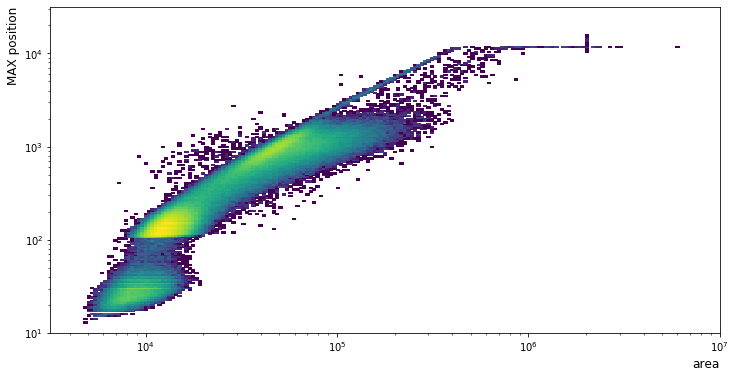

In [55]:
plot_area_max(INTs,MAXs,bins=200)

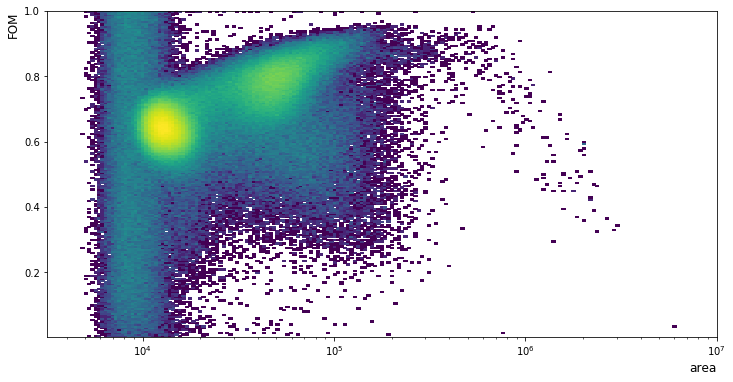

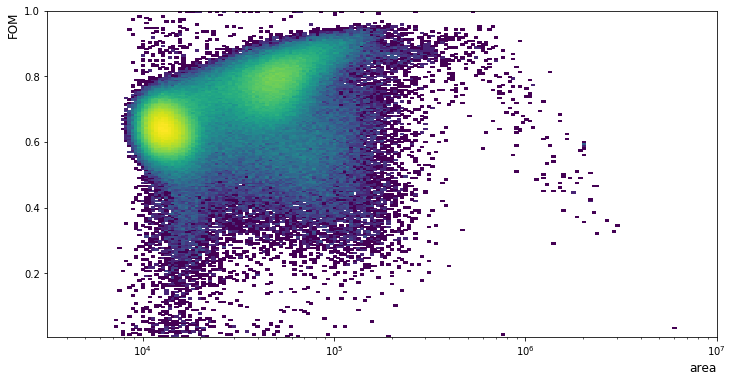

In [56]:
plot_area_fom(INTs,FOMs,bins=200)
plot_area_fom(INTs[(MAXs>100)],FOMs[(MAXs>100)],bins=200)

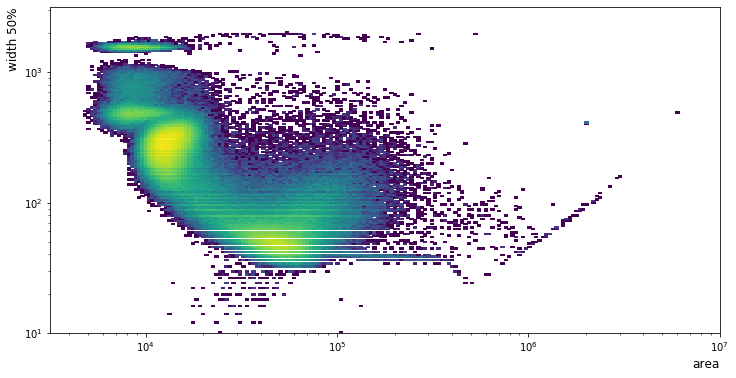

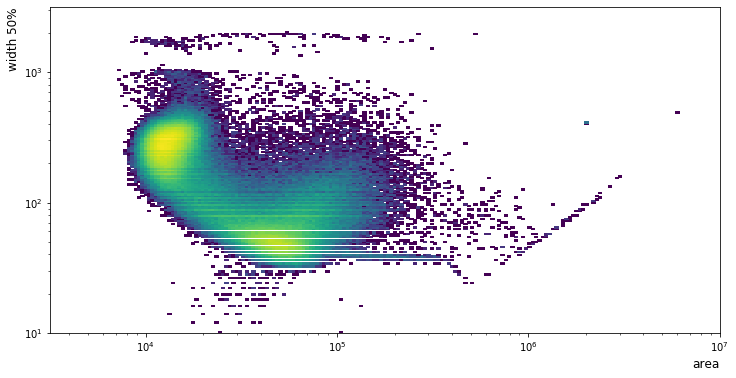

In [36]:
plot_area_width(INTs,width50,bins=200)
plot_area_width(INTs[MAXs>100],width50[MAXs>100],bins=200)

72


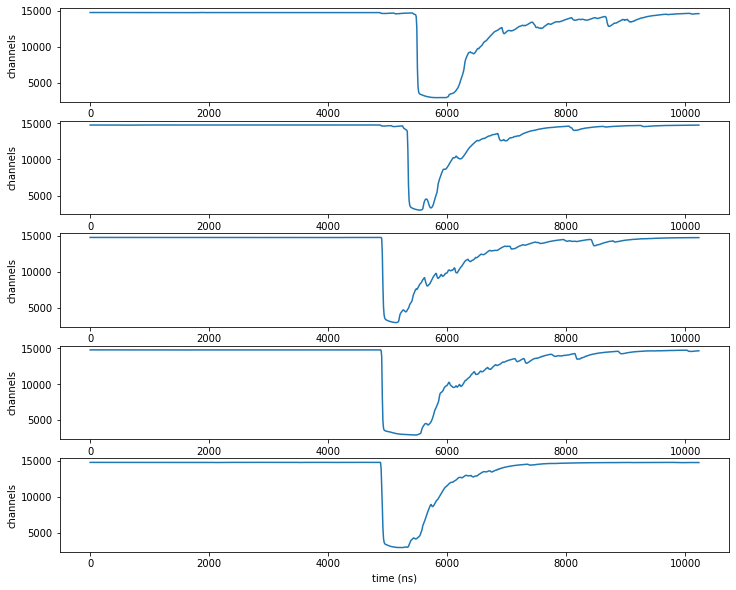

In [60]:
#datacut=data[(MAXs>4000)&(MAXs<10000)]
datacut=data[(INTs>1e6)]
print(len(datacut))
psu.plot_waveforms2( datacut, events = 5)